<a href="https://colab.research.google.com/github/Herodegon/ECGR4105-Intro-to-Machine-Learning/blob/main/Assignment3_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this assignment, we will use the Diabetes dataset and Cancer dataset. (Note: You can use the built-in function from ML libraries for gradient descent, training, and validation.)

In [549]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Problem 1 (20 points)

Using the diabetes dataset, build a logistic regression binary classifier for positive diabetes. Please use 80% and 20% split between training and evaluation (test). Make sure to perform proper scaling and standardization before your training. Draw your training results, including loss and classification accuracy over iterations. Also, report your results, including accuracy, precision, and recall, FI score. At the end, plot the confusion matrix representing your binary classifier.

In [550]:
file_path = '/content/drive/MyDrive/ECGR4105/HW3_diabetes.csv'
dataset1 = pd.DataFrame(pd.read_csv(file_path))
M=len(dataset1)
M

768

In [551]:
dataset1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [552]:
X1 = dataset1.iloc[:, [0,1,2,3,4,5,7]].values   # Using Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, and Age as inputs
Y1 = dataset1.iloc[:, 8].values

We'll create a training/test set with an 80/20 split respectively:

In [553]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.20, random_state = 0)

In [554]:
from sklearn.preprocessing import StandardScaler
sc_X1 = StandardScaler()
X1_train = sc_X1.fit_transform(X1_train)
X1_test = sc_X1.transform(X1_test)
print(X1_train)

[[ 0.90832902  0.91569367  0.44912368 ...  0.3736349   0.37852648
   1.69955804]
 [ 0.03644676 -0.75182191 -0.47230103 ... -0.69965674 -0.50667229
  -0.96569189]
 [-1.12606292  1.38763205  1.06340683 ...  5.09271083  2.54094063
  -0.88240283]
 ...
 [ 0.03644676 -0.84620959 -0.21634972 ... -0.69965674 -0.94927168
  -1.04898095]
 [ 2.0708387  -1.12937261  0.24436264 ... -0.69965674 -0.26640405
   0.11706589]
 [ 0.32707418  0.47521786  0.65388473 ... -0.69965674 -4.07275877
   2.94889395]]


For this assignment, we will need to use logistic regression. For efficiency purposes, the sklearn "Logistic Regression" function will be used. However, to show that there is already an understanding as to how Logistic Regression works, the following function built to run the model has been provided:

In [555]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

def ComputeCost(X,Y,theta):
  m = len(Y)
  predictions = X.dot(theta)                  # Scales X array by current theta value
  errors = np.subtract(predictions,Y)         # Computes the difference between every element of predictions[] and Y[]
  square_errors = np.square(errors)           # Squares the resulting error
  cost = (1/(2*m))*np.sum(square_errors)      # Computes the cost equation {(1/(2*m))*(predictions[]-Y[])^2}
  return cost

def GradientDescent(X,Y,X_test,Y_test,theta,alpha,iterations):
  m = len(Y)                                  # Number of training examples
  cost_history = np.zeros(iterations)         # Initializes empty array of size "iterations"
  valid_history = np.zeros(iterations)        # Initializes empty array of size "iterations"
  for i in range(iterations):
    predictions = sigmoid(X.dot(theta))       # Scales X array by mapping current theta value along sigmoid
    errors = np.subtract(predictions,Y)       # Computes the difference between every element of predictions[] and Y[]
    sum_delta = (alpha/m)*X.T.dot(errors)     # Solves for the sum of delta functions (errors)
    theta = theta - sum_delta                 # New theta is found by taking the difference between current value and solved delta value
    cost_history[i] = ComputeCost(X,Y,theta)  # Computes the cost for the current theta value
    valid_history[i] = ComputeCost(X_test,Y_test,theta)
  return theta, cost_history, valid_history

def TrainModel(X,Y,X_test,Y_test,alpha,iterations):
  theta = np.zeros(X.shape[1])
  theta, cost_history, valid_history = GradientDescent(X,Y,X_test,Y_test,theta,alpha,iterations)
  return theta, cost_history, valid_history

Now, Logistic Regression will be performed on the dataset:

In [556]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def PlotLoss(training_cost_history,validation_cost_history,iterations,x_label,y_label,title):
  plt.plot(range(iterations),training_cost_history, color='b', label= 'Training Loss')
  plt.plot(range(iterations),validation_cost_history, color='r', label= 'Validation Loss')
  plt.rcParams["figure.figsize"] = (6,4)
  plt.legend()

  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)

  # Print final graph
  plt.show()
  return

def PrintData(Y_test,Y_valid_pred):
  print("Accuracy Score = ", accuracy_score(Y_test, Y_valid_pred))
  print("Precision Score = ", precision_score(Y_test, Y_valid_pred))
  print("Recall Score = ", recall_score(Y_test, Y_valid_pred))
  print("F1 Score = ", f1_score(Y_test, Y_valid_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score =  0.8051948051948052
Precision Score =  0.7428571428571429
Recall Score =  0.5531914893617021
F1 Score =  0.6341463414634146


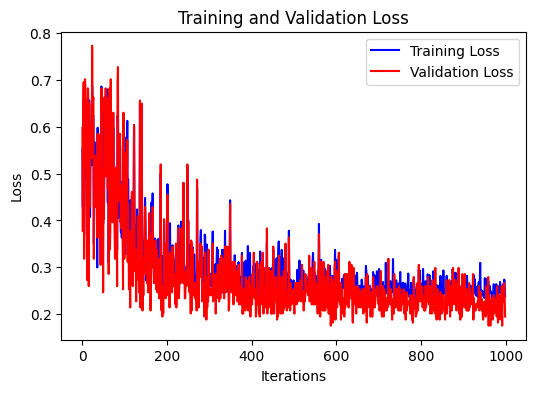

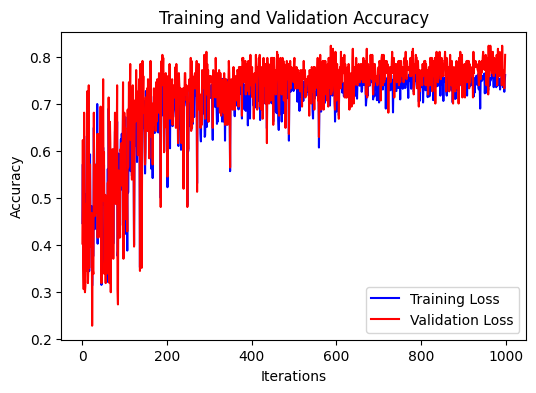

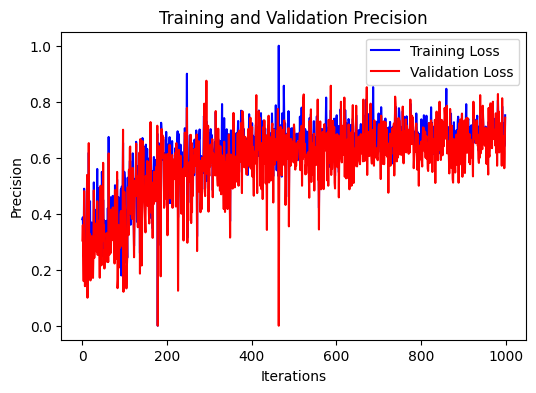

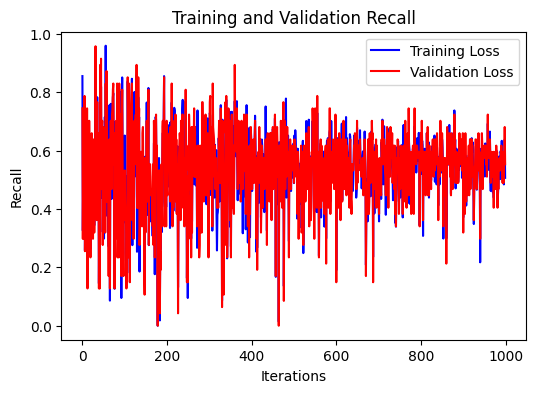

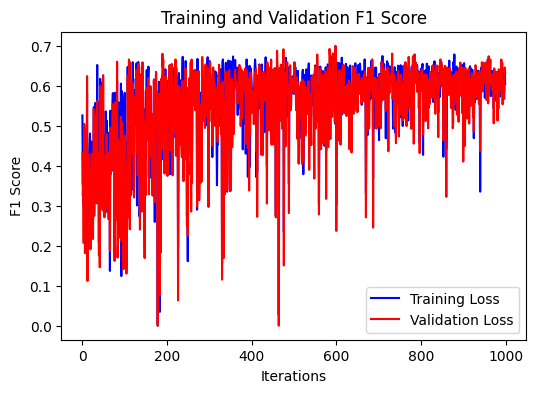

In [557]:
#Import LogisticRegression from sklearn.linear_model
#Make an instance classifier of the object LogisticRegression and give random_state =  0

Y1_train_pred = np.empty(0)
Y1_valid_pred = np.empty(0)
training_loss = []
validation_loss = []
accuracy_training = []
accuracy_validation = []
precision_training = []
precision_validation = []
recall_training = []
recall_validation = []
f1_training = []
f1_validation = []

# Model
model1 = SGDClassifier(loss='squared_error',warm_start=True)

# Training
iterations = 1000
for i in range(0,iterations):
  model1.partial_fit(X1_train,Y1_train,classes=[0,1])
  Y1_train_pred = model1.predict(X1_train)
  Y1_valid_pred = model1.predict(X1_test)

  # Append Loss History
  training_loss.append(mean_squared_error(Y1_train, Y1_train_pred))
  validation_loss.append(mean_squared_error(Y1_test, Y1_valid_pred))

  # Append Accuracy History
  accuracy_training.append(accuracy_score(Y1_train, Y1_train_pred))
  accuracy_validation.append(accuracy_score(Y1_test, Y1_valid_pred))

  # Append Precision History
  precision_training.append(precision_score(Y1_train, Y1_train_pred))
  precision_validation.append(precision_score(Y1_test, Y1_valid_pred))

  # Append Recall History
  recall_training.append(recall_score(Y1_train, Y1_train_pred))
  recall_validation.append(recall_score(Y1_test, Y1_valid_pred))

  # Append F1 Score History
  f1_training.append(f1_score(Y1_train, Y1_train_pred))
  f1_validation.append(f1_score(Y1_test, Y1_valid_pred))

PrintData(Y1_test,Y1_valid_pred)

# Print Histories Over Iterations
PlotLoss(training_loss,validation_loss,iterations,"Iterations","Loss","Training and Validation Loss")
PlotLoss(accuracy_training,accuracy_validation,iterations,"Iterations","Accuracy","Training and Validation Accuracy")
PlotLoss(precision_training,precision_validation,iterations,"Iterations","Precision","Training and Validation Precision")
PlotLoss(recall_training,recall_validation,iterations,"Iterations","Recall","Training and Validation Recall")
PlotLoss(f1_training,f1_validation,iterations,"Iterations","F1 Score","Training and Validation F1 Score")

Now we will create a confusion matrix of the model's accuracy:

In [558]:
#Using Confusion matrix we can get accuracy of our model.
from sklearn.metrics import confusion_matrix
model1_matrix = confusion_matrix(Y1_test, Y1_valid_pred)

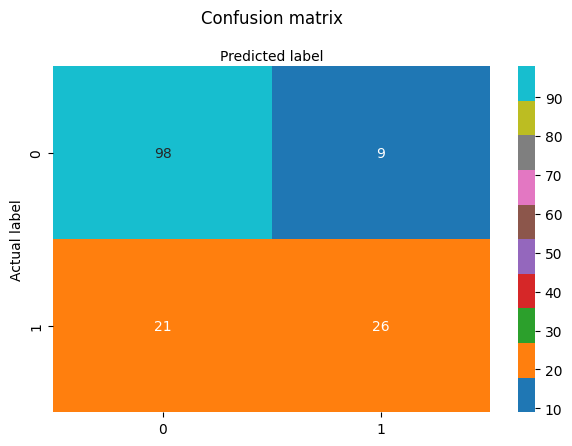

In [559]:
#Let's visualize the results of the model in the form of a co#nfusion matrix using matplotlib and seaborn.
#Here, you will visualize the confusion matrix using Heatmap.
import seaborn as sns
def PlotConfusionMatrix(cnf_matrix):
  class_names=[0,1] # name  of classes
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  # create heatmap
  sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="tab10" ,fmt='g')
  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
PlotConfusionMatrix(model1_matrix)

Problem 2 (20pts):

1. Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign). First, create a logistic regression that takes all 30 input features for classification. Please use 80% and 20% split between training and evaluation (test). Make sure to perform proper scaling and standardization before your training. Draw your training results, including loss and classification accuracy over iterations. Also, report your results, including accuracy, precision, recall and F1 score. At the end, plot the confusion matrix representing your binary classifier.

In [560]:
file_path = '/content/drive/MyDrive/ECGR4105/HW3_cancer.csv'
dataset2 = pd.DataFrame(pd.read_csv(file_path))
M=len(dataset2)
M

569

In [561]:
dataset2.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [562]:
len(dataset2.columns)

33

In [563]:
accepted_values = [True if i not in [0,1,len(dataset2.columns)-1] else False for i in range(len(dataset2.columns))]
X2 = dataset2.iloc[:, accepted_values].values   # Using all classes as inputs
print("X2 Fit = ", X2.shape[1])
print("X2 = ", X2[:5])
Y2 = dataset2.iloc[:, 1].values
for i in range(len(Y2)):
  if Y2[i] == 'M':
    Y2[i] = 1
  else:
    Y2[i] = 0
Y2 = Y2.astype(int)
print("Y2 = ", Y2)

X2 Fit =  30
X2 =  [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e

In [564]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.20, random_state = 0)
sc_X2 = StandardScaler()
X2_train = sc_X2.fit_transform(X2_train)
X2_test = sc_X2.transform(X2_test)
print("X2 Test = ", X2_test[:5])

X2 Test =  [[-2.01756035e-01  3.29078595e-01 -1.30867543e-01 -2.71455060e-01
   1.02919769e+00  8.64118359e-01  7.33638979e-01  8.56696884e-01
   1.12032775e+00  1.55358480e+00 -4.19756553e-02 -5.15882060e-01
   1.31540867e-01 -1.38756360e-01 -5.59539726e-01 -1.37973541e-01
   9.80707980e-02  2.87511965e-01 -4.24461408e-01  1.13051490e-01
   3.15041438e-02  6.76288863e-01  1.85286211e-01 -6.28080803e-02
   1.10353068e+00  8.74442671e-01  1.21909090e+00  1.38932910e+00
   1.08203284e+00  1.54029664e+00]
 [-2.55557728e-01  1.46763319e+00 -3.17804369e-01 -3.24002437e-01
  -6.16890723e-01 -1.01654032e+00 -7.69012291e-01 -7.26494747e-01
  -6.95676578e-01 -1.00245069e+00 -6.83394184e-01  2.58825850e-01
  -7.42440151e-01 -4.76228985e-01 -4.34915412e-01 -9.70882022e-01
  -5.26937769e-01 -8.81955920e-01 -8.61714253e-01 -7.22065770e-01
  -3.90179717e-01  1.42621620e+00 -4.65282304e-01 -4.23883064e-01
  -1.57481925e-01 -9.51751507e-01 -6.44331682e-01 -8.33693643e-01
  -7.31315768e-01 -8.77325222e

Accuracy Score =  0.8421052631578947
Precision Score =  0.7959183673469388
Recall Score =  0.8297872340425532
F1 Score =  0.8125


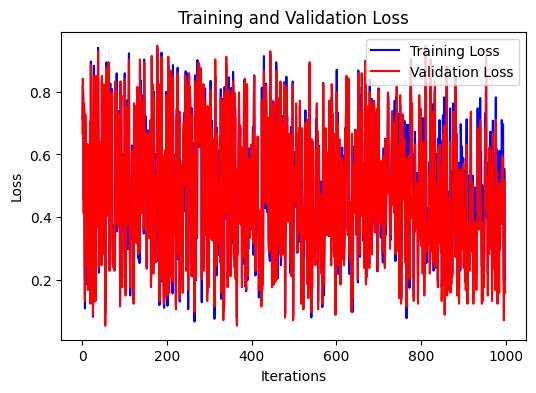

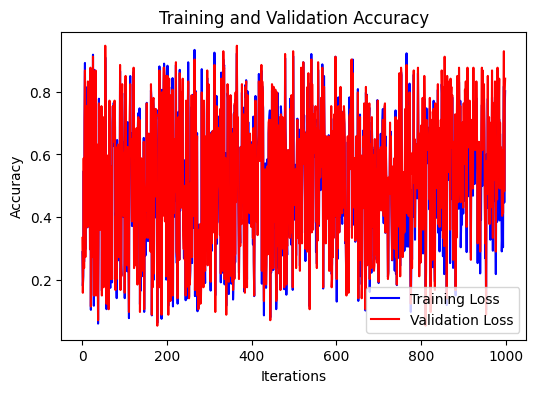

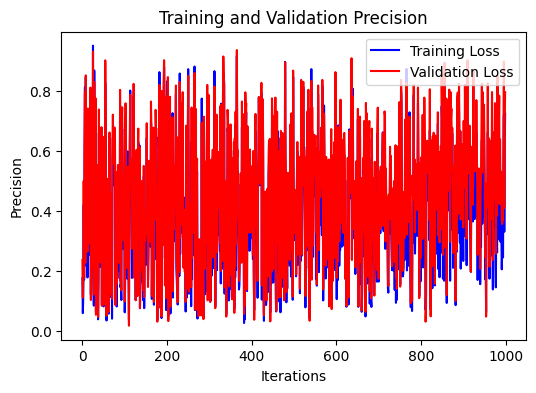

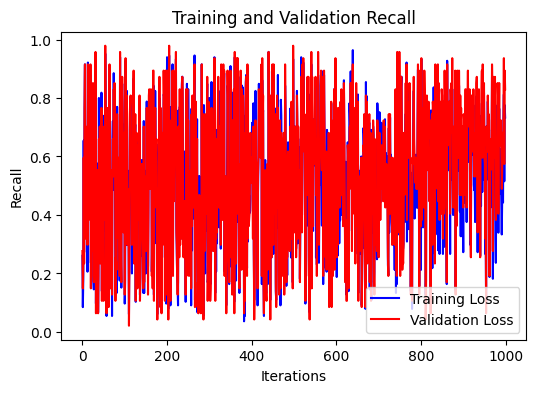

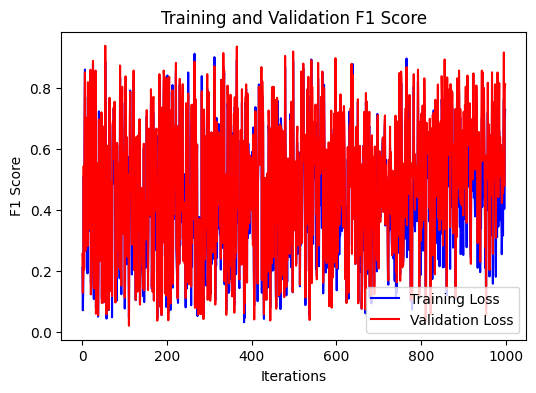

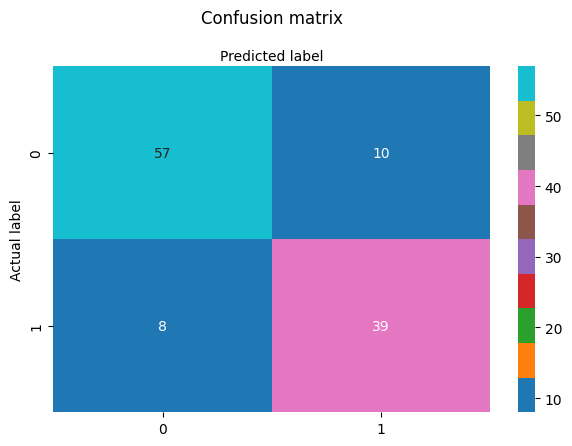

In [565]:
Y2_train_pred = np.empty(0)
Y2_valid_pred = np.empty(0)
training_loss = []
validation_loss = []
accuracy_training = []
accuracy_validation = []
precision_training = []
precision_validation = []
recall_training = []
recall_validation = []
f1_training = []
f1_validation = []

# Model
model2 = SGDClassifier(loss='squared_error',warm_start=True)

# Training
iterations = 1000
for i in range(0,iterations):
  model2.partial_fit(X2_train,Y2_train,classes=[0,1])
  Y2_train_pred = model2.predict(X2_train)
  Y2_valid_pred = model2.predict(X2_test)

  # Append Loss History
  training_loss.append(mean_squared_error(Y2_train, Y2_train_pred))
  validation_loss.append(mean_squared_error(Y2_test, Y2_valid_pred))

  # Append Accuracy History
  accuracy_training.append(accuracy_score(Y2_train, Y2_train_pred))
  accuracy_validation.append(accuracy_score(Y2_test, Y2_valid_pred))

  # Append Precision History
  precision_training.append(precision_score(Y2_train, Y2_train_pred))
  precision_validation.append(precision_score(Y2_test, Y2_valid_pred))

  # Append Recall History
  recall_training.append(recall_score(Y2_train, Y2_train_pred))
  recall_validation.append(recall_score(Y2_test, Y2_valid_pred))

  # Append F1 Score History
  f1_training.append(f1_score(Y2_train, Y2_train_pred))
  f1_validation.append(f1_score(Y2_test, Y2_valid_pred))

PrintData(Y2_test,Y2_valid_pred)

# Print Histories Over Iterations
PlotLoss(training_loss,validation_loss,iterations,"Iterations","Loss","Training and Validation Loss")
PlotLoss(accuracy_training,accuracy_validation,iterations,"Iterations","Accuracy","Training and Validation Accuracy")
PlotLoss(precision_training,precision_validation,iterations,"Iterations","Precision","Training and Validation Precision")
PlotLoss(recall_training,recall_validation,iterations,"Iterations","Recall","Training and Validation Recall")
PlotLoss(f1_training,f1_validation,iterations,"Iterations","F1 Score","Training and Validation F1 Score")

model2_matrix = confusion_matrix(Y2_test, Y2_valid_pred)
PlotConfusionMatrix(model2_matrix)

2. How about adding a weight penalty here, considering the number of parameters. Add the weight penalty and repeat the training and report the results.

Accuracy Score =  0.2982456140350877
Precision Score =  0.2676056338028169
Recall Score =  0.40425531914893614
F1 Score =  0.3220338983050848


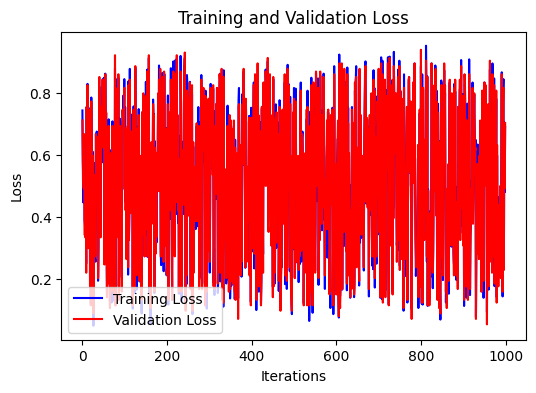

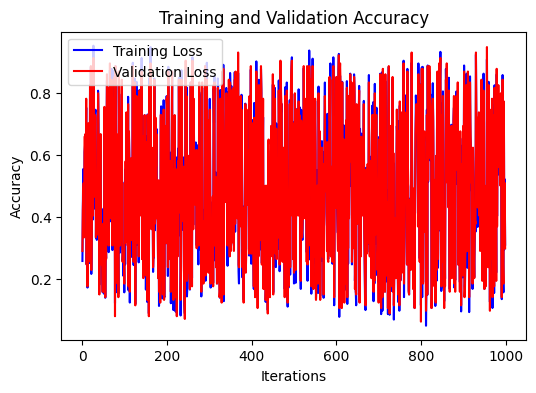

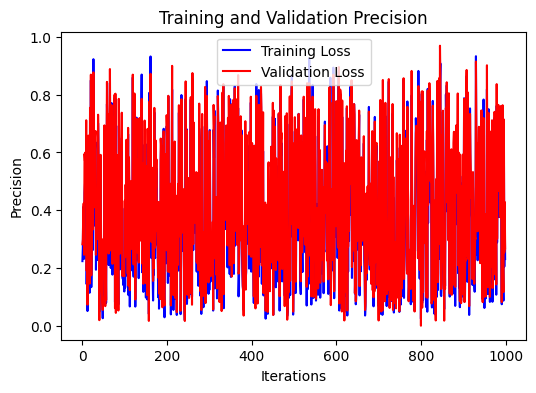

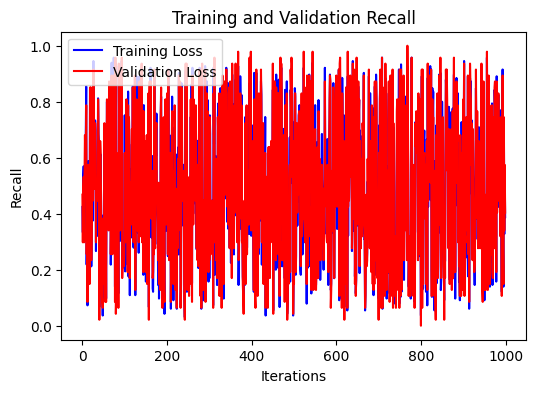

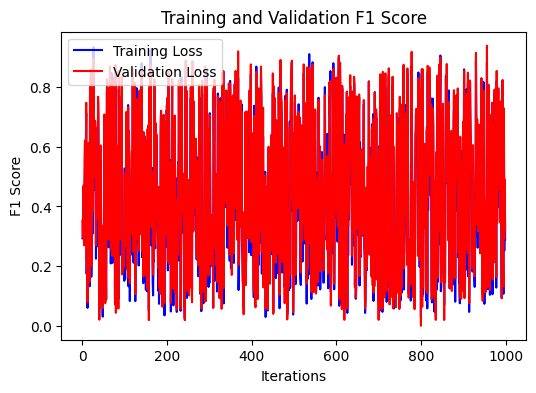

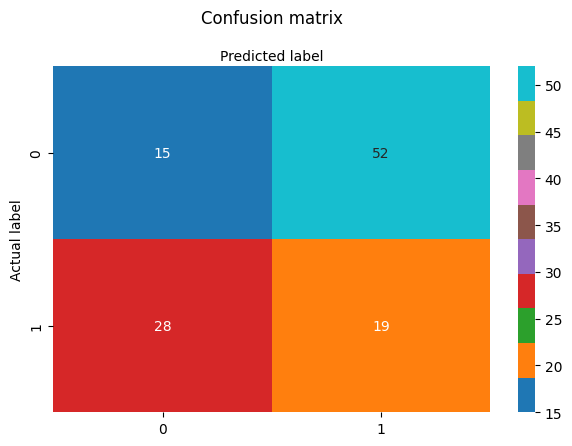

In [566]:
from sklearn.utils import compute_class_weight

Y2_train_pred = np.empty(0)
Y2_valid_pred = np.empty(0)
training_loss = []
validation_loss = []
accuracy_training = []
accuracy_validation = []
precision_training = []
precision_validation = []
recall_training = []
recall_validation = []
f1_training = []
f1_validation = []

# Model
w = {0:1,1:9}
model2 = SGDClassifier(loss='squared_error',warm_start=True, class_weight=w)

# Training
iterations = 1000
for i in range(0,iterations):
  model2.partial_fit(X2_train,Y2_train,classes=[0,1])
  Y2_train_pred = model2.predict(X2_train)
  Y2_valid_pred = model2.predict(X2_test)

  # Append Loss History
  training_loss.append(mean_squared_error(Y2_train, Y2_train_pred))
  validation_loss.append(mean_squared_error(Y2_test, Y2_valid_pred))

  # Append Accuracy History
  accuracy_training.append(accuracy_score(Y2_train, Y2_train_pred))
  accuracy_validation.append(accuracy_score(Y2_test, Y2_valid_pred))

  # Append Precision History
  precision_training.append(precision_score(Y2_train, Y2_train_pred))
  precision_validation.append(precision_score(Y2_test, Y2_valid_pred))

  # Append Recall History
  recall_training.append(recall_score(Y2_train, Y2_train_pred))
  recall_validation.append(recall_score(Y2_test, Y2_valid_pred))

  # Append F1 Score History
  f1_training.append(f1_score(Y2_train, Y2_train_pred))
  f1_validation.append(f1_score(Y2_test, Y2_valid_pred))

PrintData(Y2_test,Y2_valid_pred)

# Print Histories Over Iterations
PlotLoss(training_loss,validation_loss,iterations,"Iterations","Loss","Training and Validation Loss")
PlotLoss(accuracy_training,accuracy_validation,iterations,"Iterations","Accuracy","Training and Validation Accuracy")
PlotLoss(precision_training,precision_validation,iterations,"Iterations","Precision","Training and Validation Precision")
PlotLoss(recall_training,recall_validation,iterations,"Iterations","Recall","Training and Validation Recall")
PlotLoss(f1_training,f1_validation,iterations,"Iterations","F1 Score","Training and Validation F1 Score")

model2_matrix = confusion_matrix(Y2_test, Y2_valid_pred)
PlotConfusionMatrix(model2_matrix)

By adding weights to the model, we've increased the accuracy nearly 20% compared to the non-weighted equivalent.

Use the cancer dataset to build a naive Bayesian model to classify the type of cancer (Malignant vs. benign). Use 80% and 20% split between training and evaluation (test). Plot your classification accuracy, precision, recall, and F1 score. Explain and elaborate on your results. Can you compare your results against the logistic regression classifier you did in Problem 2.

              precision    recall  f1-score   support

           0       0.92      0.91      0.92        67
           1       0.88      0.89      0.88        47

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114



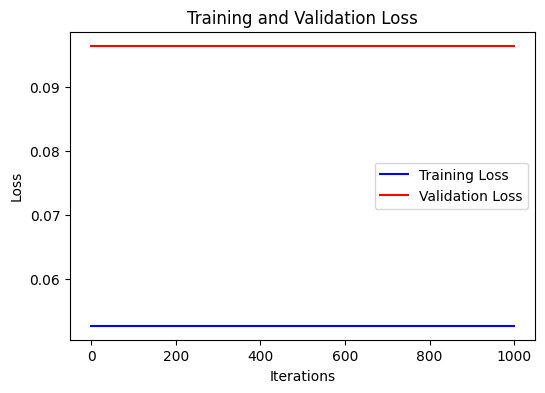

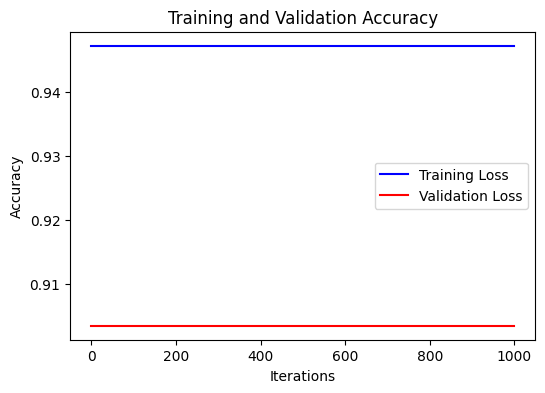

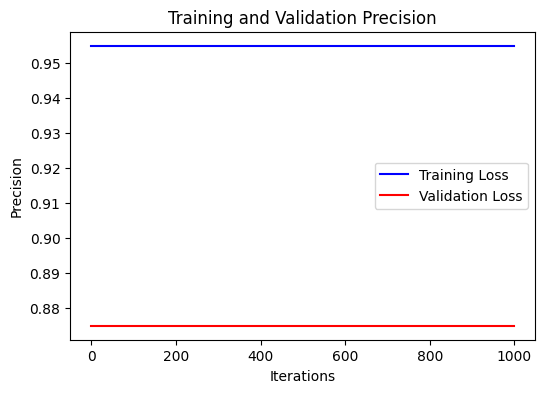

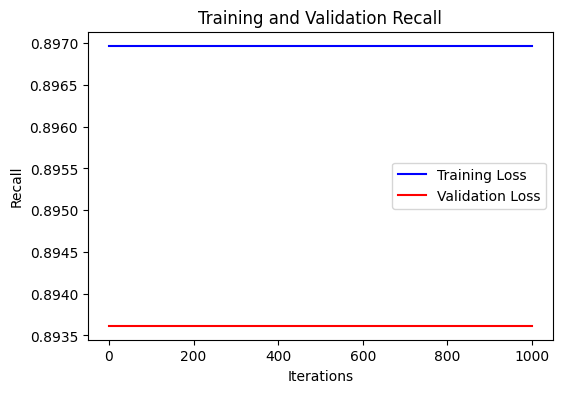

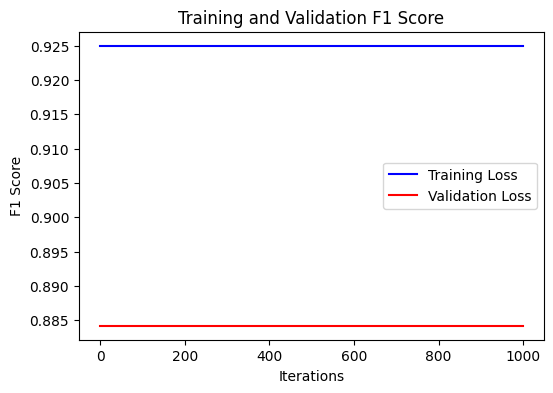

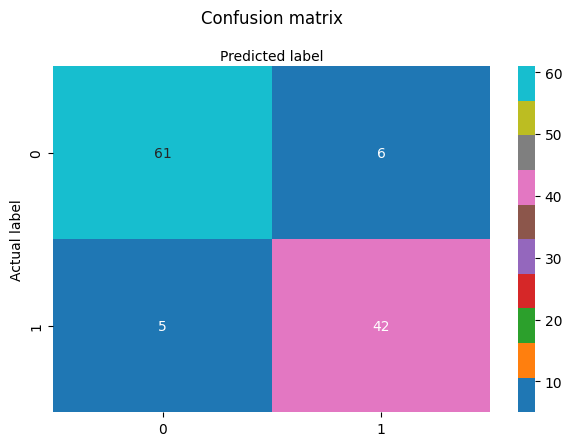

In [567]:
# Gaussian Naive Bayes
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB, MultinomialNB

Y2_train_pred = np.empty(0)
Y2_valid_pred = np.empty(0)
training_loss = []
validation_loss = []
accuracy_training = []
accuracy_validation = []
precision_training = []
precision_validation = []
recall_training = []
recall_validation = []
f1_training = []
f1_validation = []

# Model
model2 = GaussianNB()

# Training
iterations = 1000
for i in range(0,iterations):
  model2.partial_fit(X2_train,Y2_train,classes=[0,1])
  Y2_train_pred = model2.predict(X2_train)
  Y2_valid_pred = model2.predict(X2_test)

  # Append Loss History
  training_loss.append(mean_squared_error(Y2_train, Y2_train_pred))
  validation_loss.append(mean_squared_error(Y2_test, Y2_valid_pred))

  # Append Accuracy History
  accuracy_training.append(accuracy_score(Y2_train, Y2_train_pred))
  accuracy_validation.append(accuracy_score(Y2_test, Y2_valid_pred))

  # Append Precision History
  precision_training.append(precision_score(Y2_train, Y2_train_pred))
  precision_validation.append(precision_score(Y2_test, Y2_valid_pred))

  # Append Recall History
  recall_training.append(recall_score(Y2_train, Y2_train_pred))
  recall_validation.append(recall_score(Y2_test, Y2_valid_pred))

  # Append F1 Score History
  f1_training.append(f1_score(Y2_train, Y2_train_pred))
  f1_validation.append(f1_score(Y2_test, Y2_valid_pred))

print(classification_report(Y2_test, Y2_valid_pred))

# Print Histories Over Iterations
PlotLoss(training_loss,validation_loss,iterations,"Iterations","Loss","Training and Validation Loss")
PlotLoss(accuracy_training,accuracy_validation,iterations,"Iterations","Accuracy","Training and Validation Accuracy")
PlotLoss(precision_training,precision_validation,iterations,"Iterations","Precision","Training and Validation Precision")
PlotLoss(recall_training,recall_validation,iterations,"Iterations","Recall","Training and Validation Recall")
PlotLoss(f1_training,f1_validation,iterations,"Iterations","F1 Score","Training and Validation F1 Score")

model2_matrix = confusion_matrix(Y2_test, Y2_valid_pred)
PlotConfusionMatrix(model2_matrix)

On fewer iterations, the Naive Classifier model was able to arrive at a better accuracy score much faster than the Logistic Regression model even when it was weighted. This shows that logistic regression might become less effective, or be much harder to implement on models that have a higher amount of inputs.

Problem 4 (20pts):

Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign). Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K). Identify the optimum number of K, principal components that achieve the highest classification accuracy. Plot your classification accuracy, precision, recall, and F1 score over a different number of Ks. Explain and elaborate on your results and compare it against problems 2 and 3.

In [568]:
from sklearn.decomposition import PCA

prev_accuracy = 0
for i in range(1,11):
  print("Iteration = ",i)
  pca = PCA(n_components=i)
  pca_columns = []
  for j in range(0,i):
    pca_columns.append('PC' + str(i+1))
  X2_train_pca = pca.fit_transform(X2_train)
  X2_test_pca = pca.fit_transform(X2_test)
  principalDf_train = pd.DataFrame(data = X2_train_pca, columns = pca_columns)
  principalDf_test = pd.DataFrame(data = X2_test_pca, columns = pca_columns)

  Y2_train_pred = np.empty(0)
  Y2_valid_pred = np.empty(0)
  training_loss = []
  validation_loss = []
  accuracy_training = []
  accuracy_validation = []
  precision_training = []
  precision_validation = []
  recall_training = []
  recall_validation = []
  f1_training = []
  f1_validation = []

  # Model
  model2 = GaussianNB()

  model2.fit(principalDf_train,Y2_train)
  Y2_train_pred = model2.predict(principalDf_train)
  Y2_valid_pred = model2.predict(principalDf_test)

  print(classification_report(Y2_test, Y2_valid_pred))
  print("Accuracy Score = ",accuracy_score(Y2_test,Y2_valid_pred))
  if prev_accuracy == 0:
    prev_accuracy = accuracy_score(Y2_test, Y2_valid_pred)
  #elif prev_accuracy > accuracy_score(Y2_test, Y2_valid_pred):
    #break
  else:
    prev_accuracy = accuracy_score(Y2_test, Y2_valid_pred)

Iteration =  1
              precision    recall  f1-score   support

           0       0.90      0.91      0.90        67
           1       0.87      0.85      0.86        47

    accuracy                           0.89       114
   macro avg       0.88      0.88      0.88       114
weighted avg       0.89      0.89      0.89       114

Accuracy Score =  0.8859649122807017
Iteration =  2
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        67
           1       0.86      0.89      0.88        47

    accuracy                           0.89       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.90      0.89      0.90       114

Accuracy Score =  0.8947368421052632
Iteration =  3
              precision    recall  f1-score   support

           0       0.90      0.91      0.90        67
           1       0.87      0.85      0.86        47

    accuracy                           0.89       114
   macro 

Thus, `n_components = 5` is the best number of principal components to achieve a high accuracy score.

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        67
           1       0.93      0.85      0.89        47

    accuracy                           0.91       114
   macro avg       0.92      0.90      0.91       114
weighted avg       0.91      0.91      0.91       114



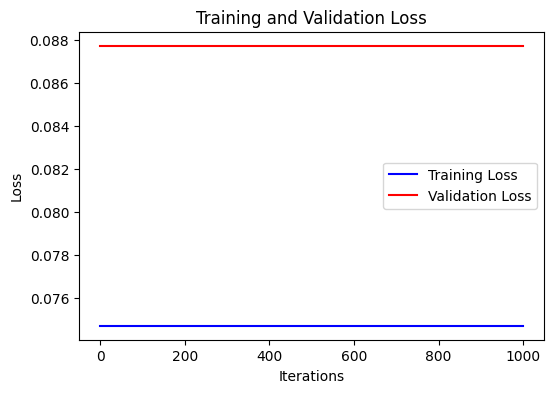

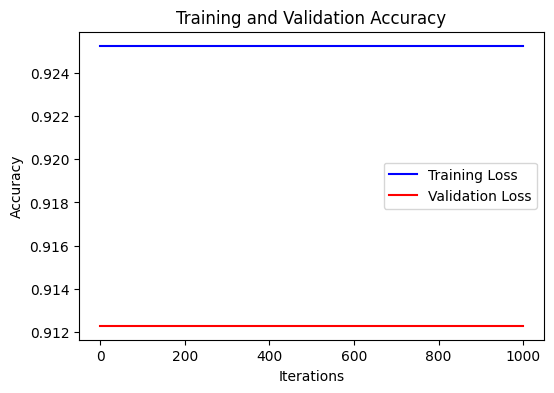

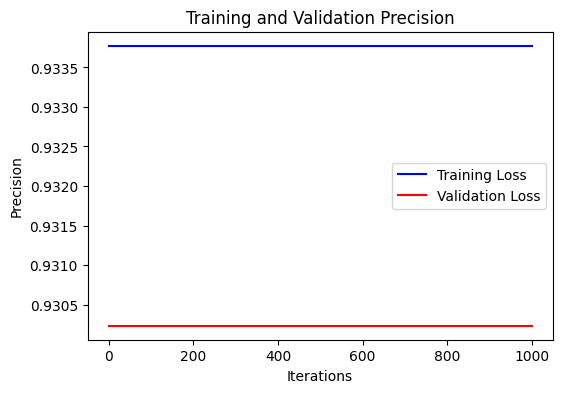

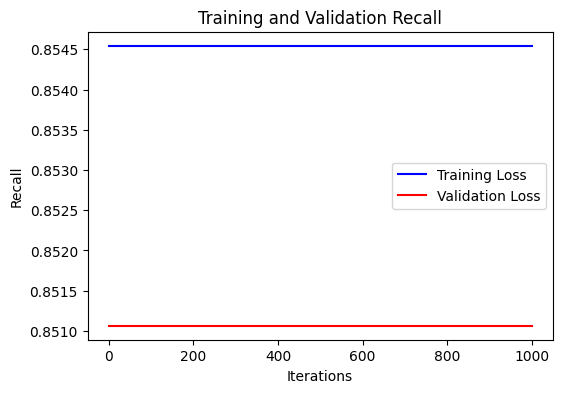

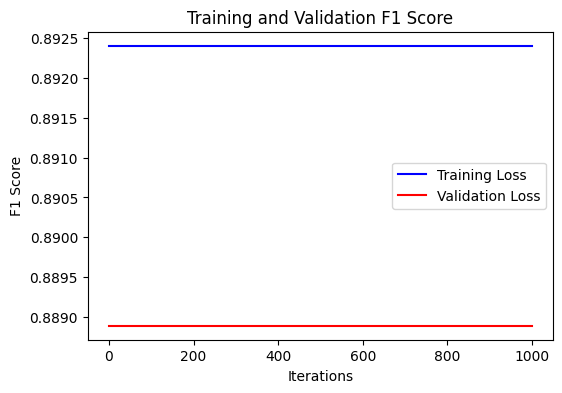

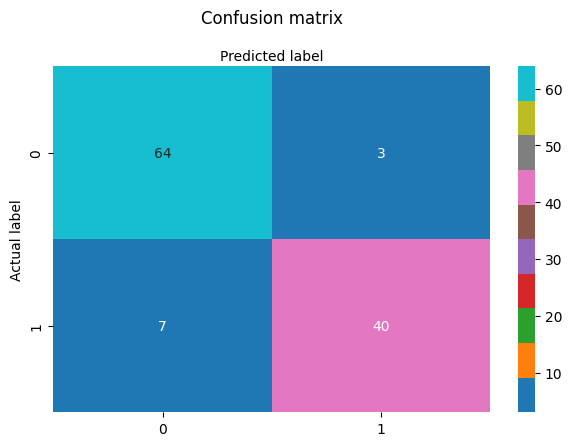

In [569]:
Y2_train_pred = np.empty(0)
Y2_valid_pred = np.empty(0)
training_loss = []
validation_loss = []
accuracy_training = []
accuracy_validation = []
precision_training = []
precision_validation = []
recall_training = []
recall_validation = []
f1_training = []
f1_validation = []

# Model
model2 = GaussianNB()

# Decomposition
pca = PCA(n_components=5)

pca_columns = []
for j in range(0,5):
  pca_columns.append('PC' + str(i+1))

X2_train_pca = pca.fit_transform(X2_train)
X2_test_pca = pca.fit_transform(X2_test)
principalDf_train = pd.DataFrame(data = X2_train_pca, columns = pca_columns)
principalDf_test = pd.DataFrame(data = X2_test_pca, columns = pca_columns)

# Training
iterations = 1000
for i in range(0,iterations):
  model2.partial_fit(principalDf_train,Y2_train,classes=[0,1])
  Y2_train_pred = model2.predict(principalDf_train)
  Y2_valid_pred = model2.predict(principalDf_test)

  # Append Loss History
  training_loss.append(mean_squared_error(Y2_train, Y2_train_pred))
  validation_loss.append(mean_squared_error(Y2_test, Y2_valid_pred))

  # Append Accuracy History
  accuracy_training.append(accuracy_score(Y2_train, Y2_train_pred))
  accuracy_validation.append(accuracy_score(Y2_test, Y2_valid_pred))

  # Append Precision History
  precision_training.append(precision_score(Y2_train, Y2_train_pred))
  precision_validation.append(precision_score(Y2_test, Y2_valid_pred))

  # Append Recall History
  recall_training.append(recall_score(Y2_train, Y2_train_pred))
  recall_validation.append(recall_score(Y2_test, Y2_valid_pred))

  # Append F1 Score History
  f1_training.append(f1_score(Y2_train, Y2_train_pred))
  f1_validation.append(f1_score(Y2_test, Y2_valid_pred))

print(classification_report(Y2_test, Y2_valid_pred))

# Print Histories Over Iterations
PlotLoss(training_loss,validation_loss,iterations,"Iterations","Loss","Training and Validation Loss")
PlotLoss(accuracy_training,accuracy_validation,iterations,"Iterations","Accuracy","Training and Validation Accuracy")
PlotLoss(precision_training,precision_validation,iterations,"Iterations","Precision","Training and Validation Precision")
PlotLoss(recall_training,recall_validation,iterations,"Iterations","Recall","Training and Validation Recall")
PlotLoss(f1_training,f1_validation,iterations,"Iterations","F1 Score","Training and Validation F1 Score")

model2_matrix = confusion_matrix(Y2_test, Y2_valid_pred)
PlotConfusionMatrix(model2_matrix)

The new model using PCA performs signifigantly better than the Logistical Regression model. Unfortunately, it only performs better than the Naive Bayes model when looking at the majority model. When looking at the minority model, it performs slightly worse. This could be a result of the number of principal components used in the decomposition. Looking at other values of principal components could remedy this lack in accuracy for the minority class.

Problem 5 (20pts):

Can you repeat problem 4? This time, replace the Bayes classifier with logistic regression. Report your results (classification accuracy, precision, recall and F1 score). Compare your results against problems 2, 3 and 4.

              precision    recall  f1-score   support

           0       0.67      0.54      0.60        67
           1       0.48      0.62      0.54        47

    accuracy                           0.57       114
   macro avg       0.57      0.58      0.57       114
weighted avg       0.59      0.57      0.57       114



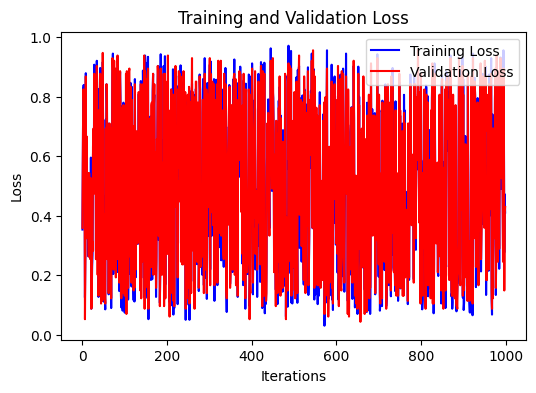

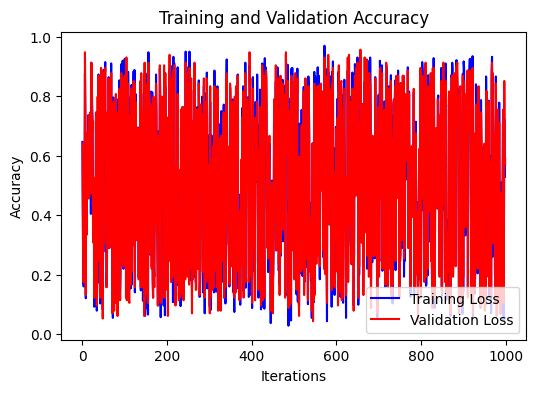

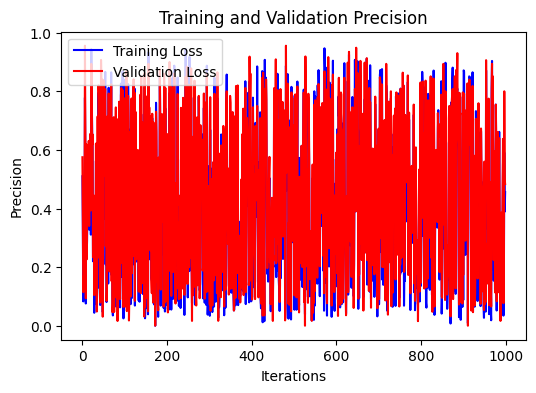

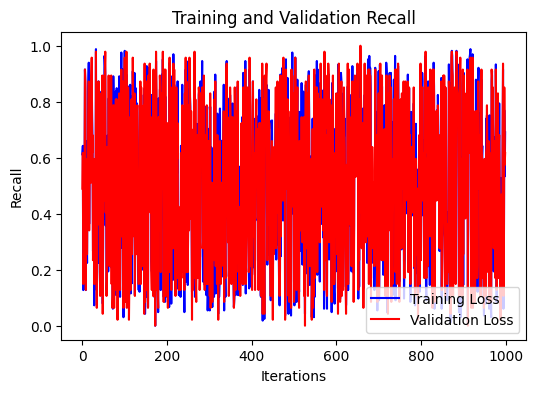

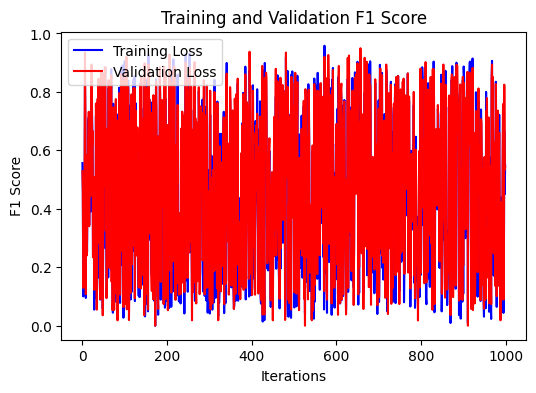

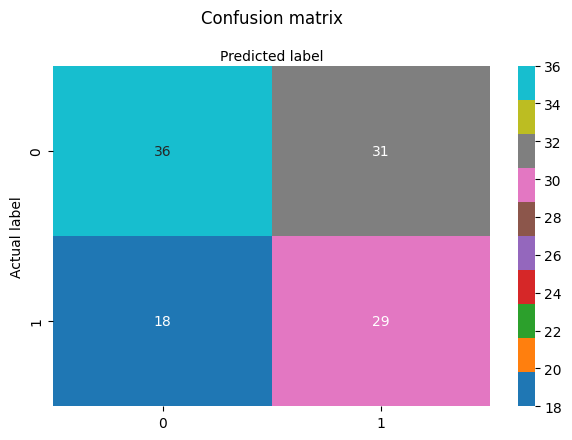

In [570]:
Y2_train_pred = np.empty(0)
Y2_valid_pred = np.empty(0)
training_loss = []
validation_loss = []
accuracy_training = []
accuracy_validation = []
precision_training = []
precision_validation = []
recall_training = []
recall_validation = []
f1_training = []
f1_validation = []

# Model
w = {0:1,1:9}
model2 = SGDClassifier(loss='squared_error',warm_start=True, class_weight=w)

# Decomposition
pca = PCA(n_components=5)

pca_columns = []
for j in range(0,5):
  pca_columns.append('PC' + str(i+1))

X2_train_pca = pca.fit_transform(X2_train)
X2_test_pca = pca.fit_transform(X2_test)
principalDf_train = pd.DataFrame(data = X2_train_pca, columns = pca_columns)
principalDf_test = pd.DataFrame(data = X2_test_pca, columns = pca_columns)

# Training
iterations = 1000
for i in range(0,iterations):
  model2.partial_fit(principalDf_train,Y2_train,classes=[0,1])
  Y2_train_pred = model2.predict(principalDf_train)
  Y2_valid_pred = model2.predict(principalDf_test)

  # Append Loss History
  training_loss.append(mean_squared_error(Y2_train, Y2_train_pred))
  validation_loss.append(mean_squared_error(Y2_test, Y2_valid_pred))

  # Append Accuracy History
  accuracy_training.append(accuracy_score(Y2_train, Y2_train_pred))
  accuracy_validation.append(accuracy_score(Y2_test, Y2_valid_pred))

  # Append Precision History
  precision_training.append(precision_score(Y2_train, Y2_train_pred))
  precision_validation.append(precision_score(Y2_test, Y2_valid_pred))

  # Append Recall History
  recall_training.append(recall_score(Y2_train, Y2_train_pred))
  recall_validation.append(recall_score(Y2_test, Y2_valid_pred))

  # Append F1 Score History
  f1_training.append(f1_score(Y2_train, Y2_train_pred))
  f1_validation.append(f1_score(Y2_test, Y2_valid_pred))

print(classification_report(Y2_test, Y2_valid_pred))

# Print Histories Over Iterations
PlotLoss(training_loss,validation_loss,iterations,"Iterations","Loss","Training and Validation Loss")
PlotLoss(accuracy_training,accuracy_validation,iterations,"Iterations","Accuracy","Training and Validation Accuracy")
PlotLoss(precision_training,precision_validation,iterations,"Iterations","Precision","Training and Validation Precision")
PlotLoss(recall_training,recall_validation,iterations,"Iterations","Recall","Training and Validation Recall")
PlotLoss(f1_training,f1_validation,iterations,"Iterations","F1 Score","Training and Validation F1 Score")

model2_matrix = confusion_matrix(Y2_test, Y2_valid_pred)
PlotConfusionMatrix(model2_matrix)

Using PCA decomposition, the accuracy of the logistic regression model, while still not better than the Naive Bayes model, is far better than it was, especially when using weighted classes.